Start by binning everything by second and take the median latency in each bin so you reduce each subject to a 200-vector (or whatever it is) of latencies and a 200-vector of points-per-taps.

normalization, just do a scatterplot across your 50 subjects of median latency for the highest reward in low env vs the equivalent in high env. 
If 2/3 are on one side of the line, it's an issue.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
%matplotlib inline

In [54]:
df1 = pd.read_csv('pilot35.csv', sep = ",")
df2 = pd.read_csv('rod_dropped.csv', sep = ",")

In [55]:
#get rid of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#replace all null and nan to the np.nan
df1 = df1.replace('null', np.nan)
df1 = df1.replace('nan', np.nan)
df2 = df2.replace('null', np.nan)
df2 = df2.replace('nan', np.nan)

#turn object into floats and round them and rename them
df1['end_time'] = round(df1['end_time'].astype(float))
df1['start_time'] = round(df1['start_time'].astype(float))
df2['end_time'] = round(df2['end_time'].astype(float))
df2['start_time'] = round(df2['start_time'].astype(float))

In [65]:
#df1.head(10)

In [57]:
df2.head(10)
del df2['index.1']
df2.columns = ['index', 'id', 'price_displayed', 'key pressed', 'environment', 'order', 'round_instance', 'task', 'function_id', 'quality_check', 'builtin_rt', 'end_time', 'start_time', 'Participant Public ID', 'latency']


In [58]:
df1_1 = df1[['index', 'id', 'builtin_rt', 'environment', 'price_displayed', 'start_time', 'end_time', 'latency','function_id', 'task']]


In [59]:
df2.columns = ['index', 'id', 'price_displayed', 'key pressed', 'environment', 'order', 'round_instance', 'task', 'function_id', 'quality_check', 'builtin_rt', 'end_time', 'start_time', 'Participant Public ID', 'latency']
df2_2 = df2[['index', 'id', 'builtin_rt', 'environment', 'price_displayed', 'start_time', 'end_time', 'latency','function_id', 'task']]


In [66]:
#df1_1.sort_values(by = ['index'])

In [74]:
data = df1_1.append(df2_2)
data = data.sort_values(by = ['index'])
data = data.set_index('index')
data = data.sort_values(by = ['id', 'start_time'])

In [75]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', None)
data.head(10000)

id  builtin_rt environment  price_displayed        start_time  \
index                                                                         
5     621711.000      32.385        high            1.800 1551893966146.000   
6     621711.000       1.495        high            1.800 1551893966283.000   
7     621711.000       9.500        high            1.800 1551893966387.000   
8     621711.000      29.325        high            1.800 1551893966499.000   
9     621711.000      19.275        high            1.800 1551893966631.000   
10    621711.000      20.230        high            1.800 1551893966753.000   
11    621711.000      28.550        high            1.800 1551893966876.000   
12    621711.000      34.165        high            1.800 1551893967008.000   
13    621711.000      27.715        high            1.800 1551893967147.000   
14    621711.000      32.510        high            1.800 1551893967278.000   
15    621711.000      52.375        high            1.800 1551893967414.000   
16    621711.000      30.085        high            1.800 1551893967570.000   
17    621711.000      33.775        high            1.800 1551893967703.000   
18    621711.000      28.175        high            1.800 1551893967842.000   
19    621711.000      25.585        high            1.800 1551893967973.000   
20    621711.000      37.015        high            1.800 1551893968104.000   
21    621711.000      51.685        high            1.800 1551893968245.000   
22    621711.000      39.850        high            1.800 1551893968399.000   
23    621711.000      39.365        high            1.800 1551893968543.000   
24    621711.000      22.125        high            1.800 1551893968685.000   
25    621711.000      35.185        high            1.800 1551893968812.000   
26    621711.000      30.805        high            1.800 1551893968950.000   
27    621711.000      31.085        high            1.800 1551893969085.000   
28    621711.000      42.935        high            1.800 1551893969220.000   
29    621711.000      35.370        high            1.800 1551893969367.000   
30    621711.000      23.880        high            1.800 1551893969505.000   
31    621711.000      16.735        high            1.800 1551893969631.000   
32    621711.000      27.295        high            1.800 1551893969752.000   
33    621711.000      31.130        high            1.800 1551893969882.000   
34    621711.000      39.820        high            1.800 1551893970017.000   
35    621711.000      41.755        high            1.800 1551893970161.000   
36    621711.000      30.105        high            1.800 1551893970306.000   
37    621711.000      50.015        high            1.800 1551893970441.000   
38    621711.000      28.770        high            1.800 1551893970595.000   
39    621711.000      27.390        high            1.800 1551893970727.000   
40    621711.000      24.640        high            1.800 1551893970858.000   
41    621711.000      48.275        high            1.800 1551893970985.000   
42    621711.000      31.060        high            1.800 1551893971138.000   
43    621711.000      40.655        high            1.800 1551893971273.000   
44    621711.000      46.705        high            1.800 1551893971416.000   
45    621711.000      36.290        high            1.800 1551893971566.000   
46    621711.000      42.680        high            1.800 1551893971706.000   
47    621711.000      31.170        high            1.800 1551893971852.000   
48    621711.000      28.660        high            1.800 1551893971986.000   
49    621711.000      29.270        high            1.800 1551893972119.000   
50    621711.000      38.555        high            1.800 1551893972252.000   
51    621711.000      36.810        high            1.800 1551893972394.000   
52    621711.000      23.790        high            1.800 1551893972535.000   
53    621711.000      32.735        high            1.800 155189

In [87]:
data.groupby('price_displayed').count()

id  builtin_rt  environment  start_time  end_time  \
price_displayed                                                         
0.100            15077       15031        15077       15077     15031   
0.300            16041       15986        16041       16041     15986   
0.700            16634       16588        16634       16634     16588   
1.200            17189       17144        17189       17189     17144   
1.800            17573       17528        17573       17573     17528   
2.500            18075       18024        18075       18075     18024   

                 latency  function_id   task  
price_displayed                               
0.100              15077        15077  13250  
0.300              16041        16041  13994  
0.700              16634        16634  14579  
1.200              17189        17189  15117  
1.800              17573        17573  15399  
2.500              18075        18075  15901

## what is normalization? (n/sum?)
## what does normalization do
## why care about normalization?
## same value --> similar speed --> scattered around y = x

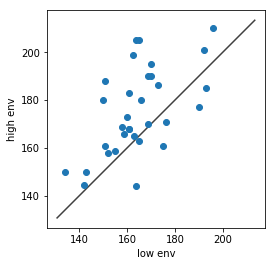

In [110]:
#For normalization, just do a scatterplot across your 50 subjects 
#of median latency 
#for the highest reward in low env vs the equivalent in high env. 
#If 2/3 are on one side of the line, it's an issue.

# Highest reward in low envrionemnt (0.5 pound worth 3000 yen) 2.5 
data_low_highest = data[(data.environment == 'low')&(data.price_displayed == 2.5)]
low_median = data_low_highest.groupby('id')['latency'].median().reset_index(name = 'median_latency')
low_median['median_latency']
# the equivalent of 2.5 in low env is 0.3 in high environment
data_high_equal = data[(data.environment == 'high')&(data.price_displayed == 0.3)]
high_median = data_high_equal.groupby('id')['latency'].median().reset_index(name = 'median_latency')
high_median['median_latency']

fig, ax = plt.subplots()
ax.scatter(low_median['median_latency'], high_median['median_latency'])
ax.set_xlabel('low env')
ax.set_ylabel('high env')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
# people tap faster in the low environment --> maybe there is a price effect

In [107]:
data['latency'].describe()

count   102654.000
mean       173.140
std         33.141
min         35.000
25%        151.000
50%        170.000
75%        192.000
max        299.000
Name: latency, dtype: float64

In [120]:
data.groupby('id')['latency'].count().mean()
# on average, subjects tapped 3207 times
len(data)/100

1026.54

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12066f400>]],
      dtype=object)

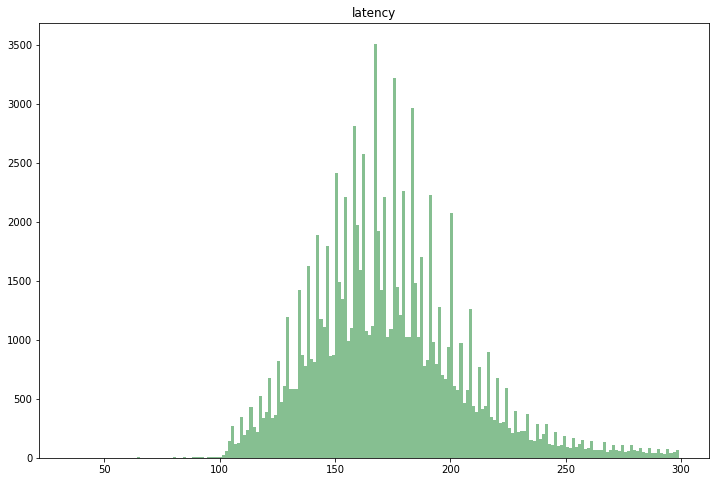

In [111]:
data.hist(column='latency', bins=200, grid=False, figsize=(12,8), color='#86bf91', rwidth=1)


In [248]:
data_711 = data[(data.id == 621711.000)]
#data_711 = data_711.reset_index()
#data_711.head(100)

In [194]:
#data_711.hist(column='latency', bins=200, grid=False, figsize=(12,8), color='#86bf91', rwidth=1)
data_711['binned'] = pd.cut(data_711.latency,range(0,300,2),right=False)
data_711.head(100)
bin_data_711 = data_711.groupby(['binned', 'price_displayed', 'index'])['latency'].median().reset_index(name = 'bin_median')
bin_data_711.head(100)
data_711 = pd.merge(bin_data_711[['index', 'bin_median']], data_711,on = 'index')
data_711 = data_711.sort_values(by='index').head(100)
data_711 = data_711.set_index('index')


In [253]:
d = data_711.groupby(np.arange(len(data_711))//15).median()
d = d.sort_values(by = 'start_time')
d.head(1000)

id  builtin_rt  price_displayed        start_time  \
0   621711.000      28.550            1.800 1551893967008.000   
1   621711.000      35.185            1.800 1551893969085.000   
2   621711.000      31.170            1.800 1551893971138.000   
3   621711.000      39.575            1.800 1551893973215.000   
4   621711.000      33.555            1.800 1551893975356.000   
5   621711.000      43.950            1.800 1551893977499.000   
6   621711.000      47.745            0.700 1551893979714.000   
7   621711.000      45.465            0.700 1551893982015.000   
8   621711.000      47.560            0.700 1551893984288.000   
9   621711.000      50.805            0.700 1551893986524.000   
10  621711.000      70.745            0.700 1551893988997.000   
11  621711.000      88.595            1.200 1551893992933.000   
12  621711.000      45.595            1.200 1551893995819.000   
13  621711.000      43.255            1.200 1551893998115.000   
14  621711.000      49.635            1.200 1551894000314.000   
15  621711.000      40.965            1.200 1551894002843.000   
16  621711.000      48.965            0.300 1551894004980.000   
17  621711.000      53.830            0.300 1551894007467.000   
18  621711.000      50.810            0.300 1551894009709.000   
19  621711.000      46.050            0.300 1551894012322.000   
20  621711.000      46.530            0.300 1551894014621.000   
21  621711.000      33.967            0.300 1551894016792.000   
22  621711.000      37.700            2.500 1551894019019.000   
23  621711.000      40.110            2.500 1551894021203.000   
24  621711.000      44.755            2.500 1551894023408.000   
25  621711.000      47.910            2.500 1551894025654.000   
26  621711.000      45.925            2.500 1551894027964.000   
27  621711.000      49.315            2.500 1551894030283.000   
28  621711.000      59.870            0.100 1551894032690.000   
29  621711.000      61.840            0.100 1551894035191.000   
30  621711.000      68.655            0.100 1551894037709.000   
31  621711.000      65.315            0.100 1551894040282.000   
32  621711.000      69.620            0.100 1551894042741.000   
33  621711.000      58.980            0.100 1551894046991.000   
34  621711.000      48.550            0.100 1551894049507.000   
35  621711.000      42.195            0.100 1551894051601.000   
36  621711.000      54.495            0.100 1551894053893.000   
37  621711.000      55.565            2.500 1551894056993.000   
38  621711.000      25.345            2.500 1551894059114.000   
39  621711.000      33.770            2.500 1551894061154.000   
40  621711.000      33.500            2.500 1551894063243.000   
41  621711.000      43.895            2.500 1551894065358.000   
42  621711.000      38.395            2.500 1551894067525.000   
43  621711.000      44.978            2.500 1551894069666.000   
44  621711.000      51.715            0.700 1551894071932.000   
45  621711.000      52.375            0.700 1551894074549.000   
46  621711.000      56.670            0.700 1551894076936.000   
47  621711.000      46.820            0.700 1551894079308.000   
48  621711.000      52.635            0.700 1551894081617.000   
49  621711.000      55.225            0.300 1551894083908.000   
50  621711.000      70.705            0.300 1551894086432.000   
51  621711.000      54.090            0.300 1551894089229.000   
52  621711.000      49.665            0.300 1551894091561.000   
53  621711.000      62.330            0.300 1551894093937.000   
54  621711.000      45.350            1.800 1551894098770.000   
55  621711.000      43.360            1.800 1551894100854.000   
56  621711.000      46.205            1.800 1551894103175.000   
57  621711.000      55.975            1.800 1551894105681.000   
58  621711.000      47.830            1.800 1551894108377.000   
59  621711.000      57.575            1.200 1551894110720.000   
60  621711.000      48.035            1.200 155

In [ ]:
6, 5, 4, 6, 6, 9, 7, 4, 5, 5, 5, 6

In [259]:
#low environment
price = d['price_displayed'][:68]
tap = np.arange(1, 69)
latency = d['latency'][:68]

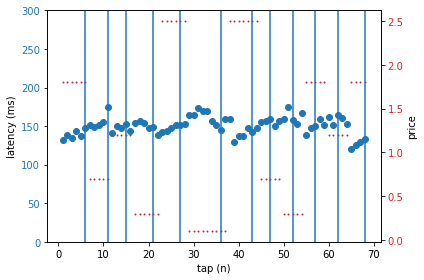

In [260]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.scatter(tap, latency, color=color)
ax1.set_ylim([0,300])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price')  # we already handled the x-label with ax1
ax2.scatter(tap, price, color=color, s = 1)
ax2.tick_params(axis='y', labelcolor=color)

plt.axvline(x=6)
plt.axvline(x=11)
plt.axvline(x=15)
plt.axvline(x=21)
plt.axvline(x=27)
plt.axvline(x=36)
plt.axvline(x=43)
plt.axvline(x=47)
plt.axvline(x=52)
plt.axvline(x=57)
plt.axvline(x=62)
plt.axvline(x=68)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
data_711_bin_order.groupby('price_displayed')
plt.axvline(x=6)
plt.axvline(x=11)
plt.axvline(x=15)
plt.axvline(x=21)
plt.axvline(x=27)
plt.axvline(x=36)
plt.axvline(x=43)
plt.axvline(x=47)
plt.axvline(x=52)
plt.axvline(x=57)
plt.axvline(x=62)
plt.axvline(x=68)



#6, #5, #4, #6, #6, #9, #7, #4, #5, #5, #5, 6

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('tap (n)')
ax1.set_ylabel('latency (ms)')
ax1.plot(low_tap, low_latency, color=color)
ax1.set_ylim([0,3000])
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [118]:
# useful link https://www.python-course.eu/pandas_python_binning.php
